In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [6]:
Creditos = pd.read_csv('/Bank_Personal_Loan.csv')

In [7]:
Creditos.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
#Quitamos la variable ID
Cred= Creditos.drop(['ID'], axis=1)

In [9]:
Cred.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
#normalizamos las variables

Cred_norm = (Cred - Cred.min())/(Cred.max()-Cred.min())
Cred_norm

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.0,0.000000,0.0,1.0,0.0,0.0,0.0
1,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.0,0.000000,0.0,1.0,0.0,0.0,0.0
2,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.5,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.5,0.000000,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.130435,0.148148,0.954731,0.000000,0.19,1.0,0.000000,0.0,0.0,0.0,1.0,0.0
4996,0.159091,0.152174,0.032407,0.947174,1.000000,0.04,0.0,0.133858,0.0,0.0,0.0,1.0,0.0
4997,0.909091,0.913043,0.074074,0.958463,0.333333,0.03,1.0,0.000000,0.0,0.0,0.0,0.0,0.0
4998,0.954545,0.934783,0.189815,0.924242,0.666667,0.05,0.5,0.000000,0.0,0.0,0.0,1.0,0.0


In [11]:
#calcular las similitudes entre las variables

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter = 300)
    kmeans.fit(Cred_norm)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

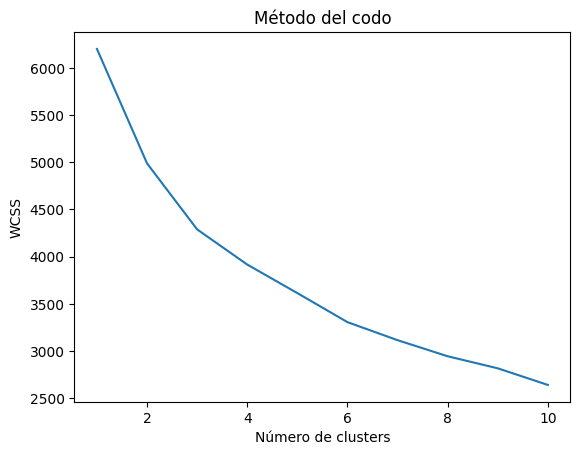

In [12]:
#gráfica de codo
plt.plot(range(1,11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show

In [41]:
#K-medias
clustering = KMeans(n_clusters=5, max_iter=300)
clustering.fit(Cred_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [42]:
Creditos["KMeans_Cluster"] = clustering.labels_
Creditos.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,KMeans_Cluster
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,4


In [43]:
#
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_creditos = pca.fit_transform(Cred_norm)
pca_creditos_df = pd.DataFrame(data = pca_creditos, columns=['PC1', 'PC2'])
pca_id = pd.concat([pca_creditos_df, Creditos['KMeans_Cluster']], axis=1)
pca_id

,PC1,PC2,KMeans_Cluster
0,-0.593970,-0.169405,0
1,-0.589588,-0.173762,0
2,-0.639658,-0.208522,0
3,-0.654184,-0.212465,0
4,-0.500783,0.775334,4
...,...,...,...
4995,0.292106,-0.397889,1
4996,0.349516,-0.355879,3
4997,-0.660628,-0.213900,0
4998,0.347498,-0.362944,1


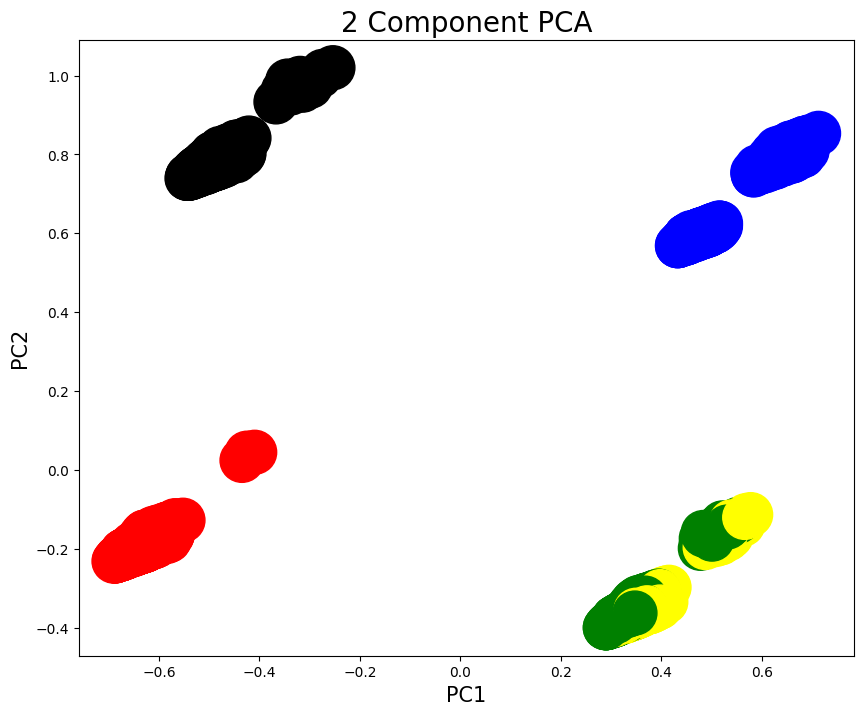

In [44]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

color_theme = np.array(['red', 'green', 'blue', 'yellow', 'black', 'purple'])
ax.scatter(x = pca_id['PC1'], y = pca_id['PC2'], c = color_theme[pca_id['KMeans_Cluster']], s = 1000)

plt.show()